In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba # 分词
from wordcloud import WordCloud # 词云可视化
import matplotlib as mpl
from pyecharts import Geo # 地理图

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#配置风格
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15.,15.]

In [8]:
data = pd.read_excel('E:\jupyter-notebook\data\Thai_TV.xls')
data.rename(columns={'电视剧':'tv','电视剧名':'name','集数':'num','上映时间':'time','评分':'score','主演':'act','类型':'type','播放量':'play','评论数量':'comm','获赞量':'pra'},inplace=True) # 列名重命名
data.head(5) # 全部信息读取前五行

,tv,name,num,time,score,act,type,play,comm,pra
0,泰国电视剧,美梦成真,32集全,2014-11-24,7.6,普提查·克瑟辛,剧情,"50,990,575","3,957","6,071"
1,泰国电视剧,你的爱，我无力拒绝,36集全,2012-10-26,7.6,阿卡盼·纳玛,剧情,"127,092,425","7,300","14,843"
2,泰国电视剧,天鹅套索,32集全,2009-05-20,7.7,维拉帕特.苏帕派布尔,剧情,"35,295,725","3,369","63,330"
3,泰国电视剧,无忧的天堂,37集全,2012-04-09,7.3,纳瓦·君拉纳拉,剧情,"62,633,843","6,620","94,241"
4,泰国电视剧,爱恨一线牵,35集全,2012-02-07,7.6,颂恩·宋帕山,剧情,"29,289,776","4,862","39,330"


In [9]:
# 1根据总评数量来判断汽车在市场上的受欢迎程度前20辆
data.sort_values('pra',ascending=False).head(5) 

,tv,name,num,time,score,act,type,play,comm,pra
3,泰国电视剧,无忧的天堂,37集全,2012-04-09,7.3,纳瓦·君拉纳拉,剧情,"62,633,843","6,620","94,241"
10,泰国电视剧,情牵两世,共17集,2011-08-01,8.0,阿卡盼·纳玛,剧情,"1,150,752",68,938
26,泰国电视剧,爱的世界,共14集,2014-11-26,7.4,马克·普林,剧情,"223,215",11,93
39,泰国电视剧,臻爱,18集全,2012-07-23,7.0,卡侬尼·加萨米特诺,家庭,"2,769,407",648,"9,346"
64,泰国电视剧,勇于挑战梦想的海豚,25集全,2011-03-05,7.5,努娜·能提妲·索彭,剧情,"217,820",109,884


In [14]:
data['播放排名'] = data['play'].rank(ascending=False).astype("int")
data.head(5) # 全部信息读取前五行

,tv,name,num,time,score,act,type,play,comm,pra,播放排名
0,泰国电视剧,美梦成真,32集全,2014-11-24,7.6,普提查·克瑟辛,剧情,"50,990,575","3,957","6,071",18
1,泰国电视剧,你的爱，我无力拒绝,36集全,2012-10-26,7.6,阿卡盼·纳玛,剧情,"127,092,425","7,300","14,843",61
2,泰国电视剧,天鹅套索,32集全,2009-05-20,7.7,维拉帕特.苏帕派布尔,剧情,"35,295,725","3,369","63,330",31
3,泰国电视剧,无忧的天堂,37集全,2012-04-09,7.3,纳瓦·君拉纳拉,剧情,"62,633,843","6,620","94,241",13
4,泰国电视剧,爱恨一线牵,35集全,2012-02-07,7.6,颂恩·宋帕山,剧情,"29,289,776","4,862","39,330",43


In [15]:
data.sort_values('score',ascending=False).head(5) # 总评最多的五个汽车信息

,tv,name,num,time,score,act,type,play,comm,pra,播放排名
36,泰国电视剧,为爱所困1,共12集,2014-06-28,8.0,韦·那瓦·蓬朴提岸,剧情,"75,077",14,146,6
44,泰国电视剧,日落湄南河,24集全,2013-01-28,8.0,Bie,剧情,"2,133,937","1,619","12,330",56
10,泰国电视剧,情牵两世,共17集,2011-08-01,8.0,阿卡盼·纳玛,剧情,"1,150,752",68,938,70
2,泰国电视剧,天鹅套索,32集全,2009-05-20,7.7,维拉帕特.苏帕派布尔,剧情,"35,295,725","3,369","63,330",31
29,泰国电视剧,鹰与蛇,共25集,2011-09-15,7.7,翁沙功·波拉玛塔功,剧情,"86,604",10,135,3


In [14]:
data.tail()  # 全部信息读取后五行

,tv,name,num,time,score,act,type,play,comm,pra,播放排名
66,泰国电视剧,辣椒与盐,19集全,2012-08-04,4.9,卡曼妮·耶美肯,剧情,"3,480,345",662,"10,309",41
67,泰国电视剧,太阳幻影,13集全,2013-04-03,4.9,阿提查·春那侬,剧情,"1,559,087",481,"5,448",63
68,泰国电视剧,蜜色死神,6集全,2013-05-13,4.9,提拉德·翁坡帕,剧情,"2,732,045",583,"8,947",54
69,泰国电视剧,命中注定我爱你,共20集,2017-09-04,7.3,Bie,剧情,"663,927",71,308,12
70,泰国电视剧,花戒指,共21集,2017-11-29,7.4,普提查·克瑟辛,剧情,"30,650",13,77,37


In [5]:
data.sort_values('score',ascending=False).head(5) # 评分最高的五个电视剧信息

,tv,name,num,time,score,act,type,play,comm,pra
36,泰国电视剧,为爱所困1,共12集,2014-06-28,8.0,韦·那瓦·蓬朴提岸,剧情,"75,077",14,146
44,泰国电视剧,日落湄南河,24集全,2013-01-28,8.0,Bie,剧情,"2,133,937","1,619","12,330"
10,泰国电视剧,情牵两世,共17集,2011-08-01,8.0,阿卡盼·纳玛,剧情,"1,150,752",68,938
2,泰国电视剧,天鹅套索,32集全,2009-05-20,7.7,维拉帕特.苏帕派布尔,剧情,"35,295,725","3,369","63,330"
29,泰国电视剧,鹰与蛇,共25集,2011-09-15,7.7,翁沙功·波拉玛塔功,剧情,"86,604",10,135


In [6]:
data.sort_values('time',ascending=False).head(20) # 照时间排序

,tv,name,num,time,score,act,type,play,comm,pra
5,泰国电视剧,幕后,19集全,2018-03-11,6.2,拉查雯·万薇瑞亚,剧情,"5,831,002","1,076",755
70,泰国电视剧,花戒指,共21集,2017-11-29,7.4,普提查·克瑟辛,剧情,"30,650",13,77
69,泰国电视剧,命中注定我爱你,共20集,2017-09-04,7.3,Bie,剧情,"663,927",71,308
20,泰国电视剧,房屋神灵,共0集,2016-03-02,7.4,杰西达邦·福尔迪,剧情,"138,325",3,53
47,泰国电视剧,龙裔黑帮之野牛,共10集,2015-05-18,7.7,提拉德·翁坡帕,剧情,"47,770",10,67
16,泰国电视剧,魅之戒,共15集,2015-03-21,7.4,卡曼妮·耶美肯,剧情,"318,493",21,233
23,泰国电视剧,红石坊,共16集,2015-01-26,7.0,维拉帕特.苏帕派布尔,剧情,"37,548",1,30
26,泰国电视剧,爱的世界,共14集,2014-11-26,7.4,马克·普林,剧情,"223,215",11,93
0,泰国电视剧,美梦成真,32集全,2014-11-24,7.6,普提查·克瑟辛,剧情,"50,990,575","3,957","6,071"
12,泰国电视剧,炫,共17集,2014-10-09,7.4,帕德容琶·砂楚,剧情,"450,127",41,337


In [6]:
data.sort_values('play',ascending=True).head(5) # 播放量最低的五个电视剧信息

,tv,name,num,time,score,act,type,play,comm,pra
8,泰国电视剧,我亲爱的小冤家,,2011-06-22,7.5,查克利·彦纳姆,剧情,"1,140,507",11,272
10,泰国电视剧,情牵两世,共17集,2011-08-01,8.0,阿卡盼·纳玛,剧情,"1,150,752",68,938
57,泰国电视剧,心的约束,12集全,2010-07-25,4.9,阿提查·春那侬,都市,"1,165,820",299,"3,210"
11,泰国电视剧,穿越时空寻找爱,,2011-04-23,7.7,Bie,爱情,"1,194,415",15,214
30,泰国电视剧,创造天堂,12集全,2010-09-01,7.3,皮查雅·瓦塔那蒙迪里,偶像,"1,279,408",195,"3,529"


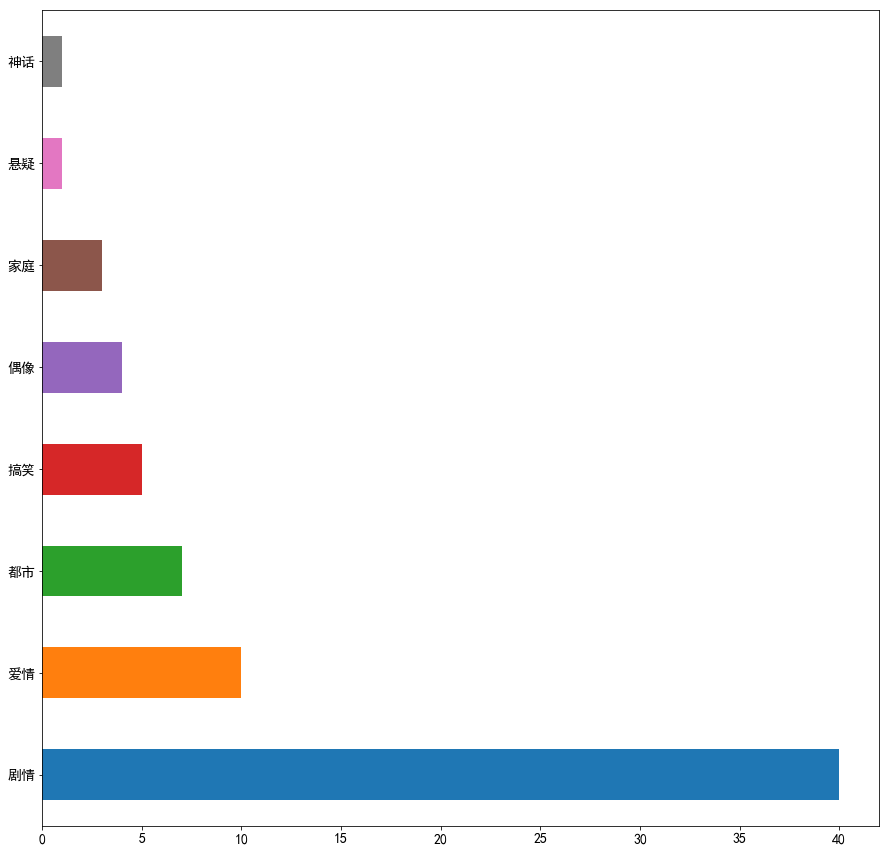

In [7]:
data['type'].value_counts().plot(kind='barh',rot=0) # value_counts() 数据计数，.plot 画图，barh 柱状图(横),rot 旋转刻度
plt.show()

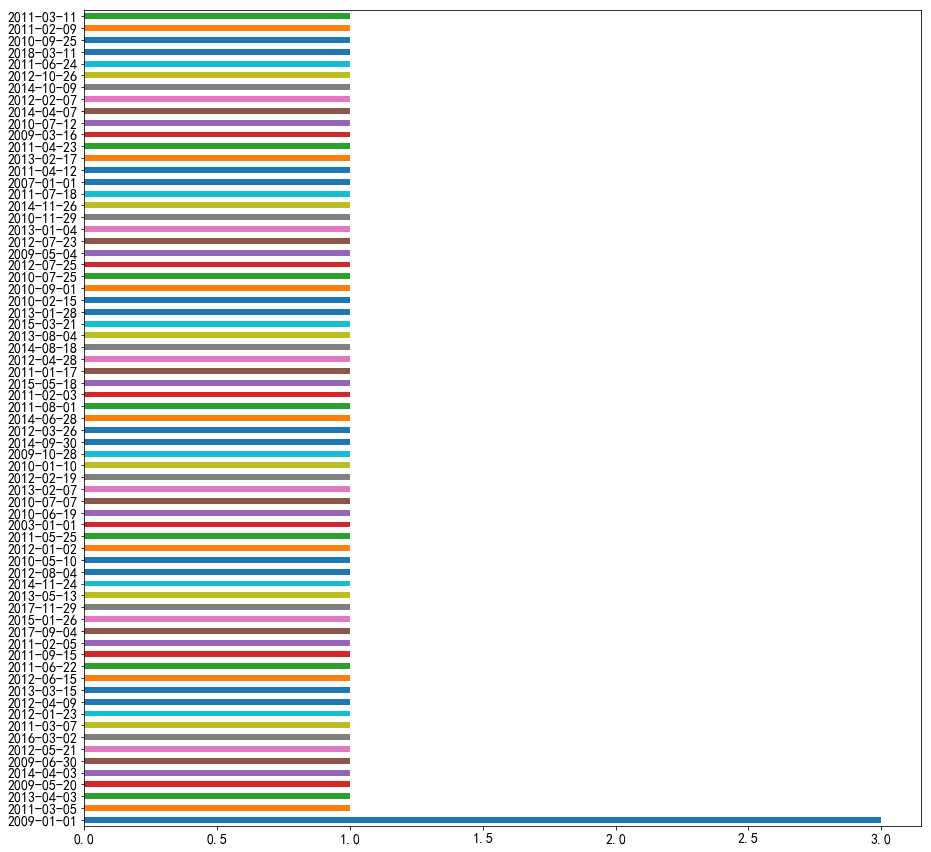

In [8]:
data['time'].value_counts().plot(kind='barh',rot=0)
plt.show()

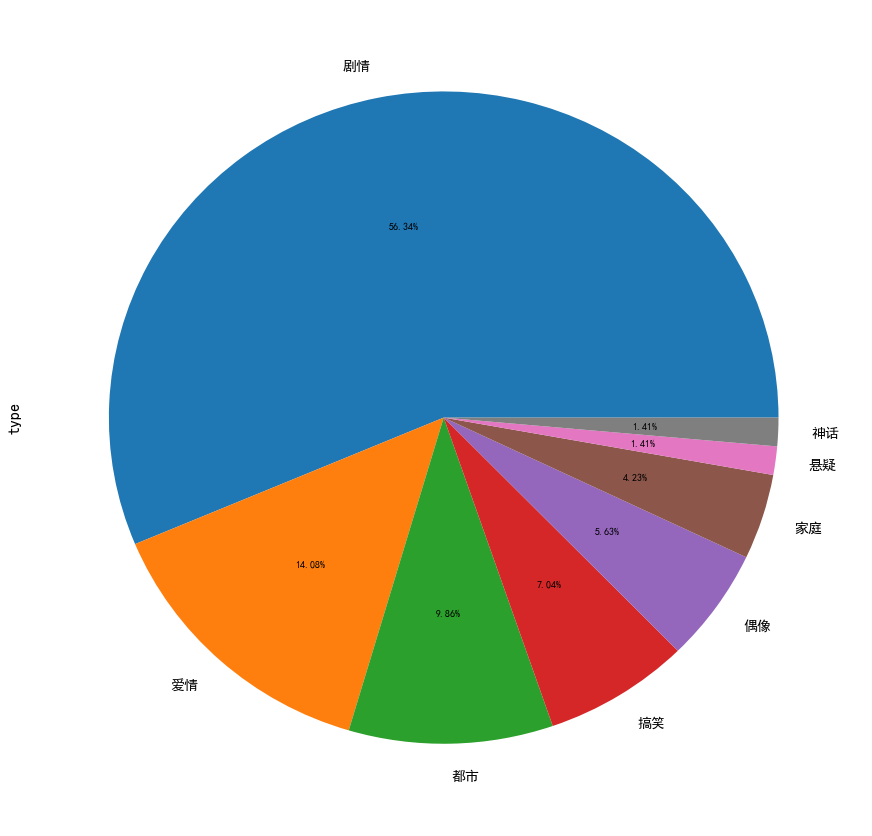

In [9]:
data['type'].value_counts().plot(kind='pie',autopct='%1.2f%%') # 剧情饼图，value_counts为对data每列中出现的数字进行统计
plt.show()

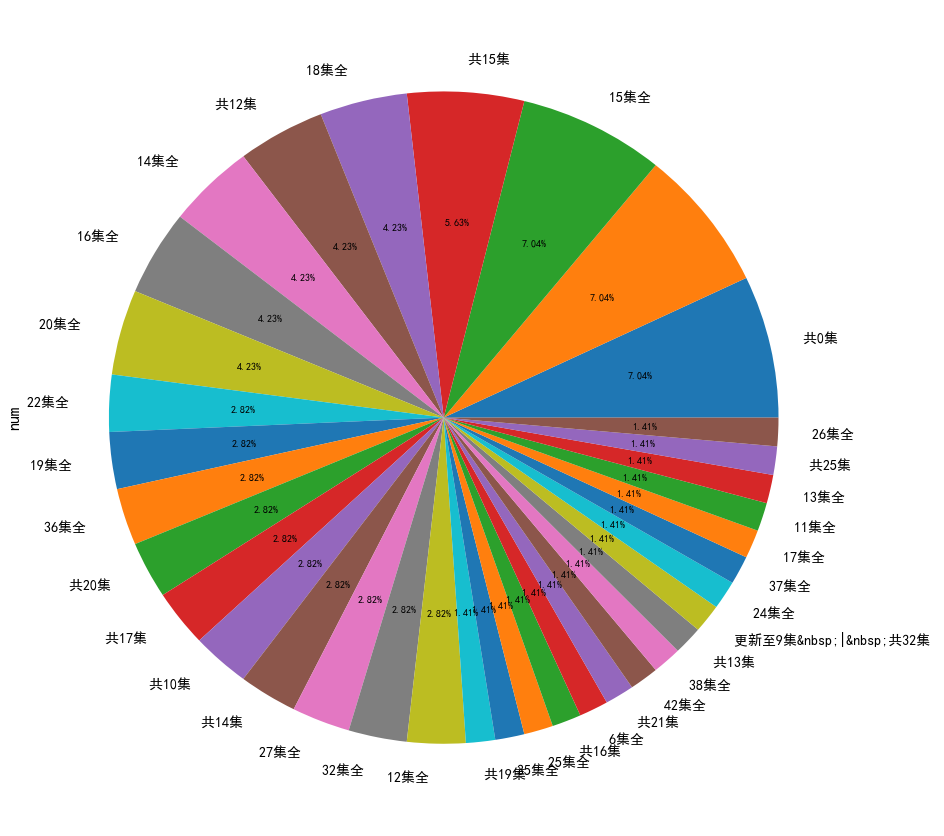

In [10]:
data['num'].value_counts().plot(kind='pie',autopct='%1.2f%%') # 集数饼图
plt.show()